<a href="https://colab.research.google.com/github/AmeerAliSaleem/MA4J5_Project/blob/main/Ameer_Ali_Saleem_MA4J5_binary_class_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import regex as re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
sns.set()

In [3]:
df = pd.read_csv("binary_class_balanced.csv")

In [4]:
df.head()

,overall,reviewTime,reviewText,summary
0,Negative,"11 12, 2013",I could not read the entire story. The book wa...,nope
1,Positive,"09 9, 2013",Greetings from Australia. A brilliant story. W...,Brilliant
2,Positive,"01 25, 2014",My first book from this author and I really li...,Beautiful
3,Positive,"02 24, 2016","Dark City is quite a dark novel, chilling and ...","Dark thriller, worth reading."
4,Negative,"03 16, 2015",Plodding,Two Stars


In [5]:
df['overall'].value_counts()

Negative    85690
Positive    85690
Name: overall, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     171380 non-null  object
 1   reviewTime  171380 non-null  object
 2   reviewText  171339 non-null  object
 3   summary     171294 non-null  object
dtypes: object(4)
memory usage: 5.2+ MB


# Text Preprocessing

In [7]:
df["reviewText"] = df["reviewText"].astype(str)

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# custom stopwords
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
             'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
             'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
             'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
             'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
             'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
             'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
             'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
             'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
             'few', 'more', 'most', 'other', 'some', 'such']

In [10]:
reviews_cleaned = []

for i in range(len(df["reviewText"])):
  reviews_raw = df["reviewText"].iloc[i]
  reviews_edit_1 = reviews_raw.lower()
  reviews_edit_2 = re.sub(r"[^a-zA-Z0-9\s\.]", "", reviews_edit_1) # Filter punctuation
  # reviews_edit_3 = re.sub(" \.|\. ", "", reviews_edit_2) # Get rid of fullstops that are outside of words
  reviews_cleaned.append(reviews_edit_2.strip()) # remove unnecessary whitespace and append to list of cleaned reviews

In [11]:
# remove stopwords from the cleaned list
filtered_reviews = [
    ' '.join(word for word in sentence.split() if word.lower() not in stopwords)
    for sentence in reviews_cleaned
]

In [12]:
# compare first record vs record with stopwords removed
print(reviews_cleaned[0])
print(filtered_reviews[0])

i could not read the entire story. the book was a complete waste of my time glad i got it as a freebie.
could not read entire story. book complete waste time glad got freebie.


In [13]:
# observe first five filtered reviews + scores
for i in range(5):
  print(filtered_reviews[i])
  print(df["overall"][i])

could not read entire story. book complete waste time glad got freebie.
Negative
greetings australia. brilliant story. knew could maintain interest tension conversation waitress old man. only stephen king can better job writing interesting prose seemingly mundane. highly recommended.
Positive
first book author really like her. will follow writings. like dynamics work. characters very easy understand follow. must read .
Positive
dark city quite dark novel chilling intricate kind just read through. even havent read previous novels series case stand alone piece. starts somewhat familiar scenario private detective drinks smokes capable outwitting local police enforcement. yet not typical not really. even protagonist seems familiar rest characters quite different youd expect theyre interesting follow. plot very interesting emotional twists turns will bring feeling uneasiness alertness one loves getting good thriller. london atmosphere quite attractive well. enjoyed authors sense humor darki

## Train-test split

In [14]:
labels = list(df["overall"])

# Shuffle the data.

filtered_reviews, labels = zip(*random.sample(list(zip(filtered_reviews,labels)), len(filtered_reviews)))
filtered_reviews = list(filtered_reviews)
labels = list(labels)

# Train-test split (66:33)

trainsize = int(len(filtered_reviews)*0.66)

train_reviews, train_labels = filtered_reviews[:trainsize], labels[:trainsize]
test_reviews, test_labels = filtered_reviews[trainsize:], labels[trainsize:]

In [15]:
# Check distribution reviews in the training set

print("TRAINING SET")
print("Number of reviews to use for training is: {}.".format(len(train_labels)))
print("Number of positive reviews is: {} (or {:.1f}%).".format(sum(np.array(train_labels)=='Positive'),100*sum(np.array(train_labels)=='Positive')/len(train_labels)))
print("Number of 3-negative reviews is: {} (or {:.1f}%).".format(sum(np.array(train_labels)=='Negative'),100*sum(np.array(train_labels)=='Negative')/len(train_labels)))

TRAINING SET
Number of reviews to use for training is: 113110.
Number of positive reviews is: 56537 (or 50.0%).
Number of 3-negative reviews is: 56573 (or 50.0%).


## Tokenisation

The word tokenizer provided by the Keras package will be able to deal with full stops for us, e.g. "missing." and "missing" will be treated as the same token.

Now for the tokenisation. In particular, we must conduct this separately on the training and test sets. The reason for this is due to so-called "data leakage": we do not want to introduce any elements of the testing data to the network before or during training. These two sets should be kept as separate as possible.

In the following:
* `vocab_size' corresponds to the n most common words in the dataset to be vectorised.
* `max_length' corresponds to the maxmimum length of the word embedding vectors to use as input for our neural network.

In [16]:
# max size of our vectorised corpus
vocab_size = 2500

# maximum allowed length for each vectorised sentence into our neural network
max_length = 50

# Tokenization
# OOV token deals with words that our tokenizer has not seen before (e.g. in the test set)
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_reviews)
test_sequences = tokenizer.texts_to_sequences(test_reviews)

# padding sequences to standardise the input size of each row of data for our NN
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [17]:
print(len(train_padded))

113110


In [18]:
type(train_labels[0])

str

In [19]:
# convert sentiment classes to numbers

sentiment_to_number = {'Positive':1, 'Negative':0}

train_labels = [sentiment_to_number.get(item, item) for item in train_labels]
test_labels = [sentiment_to_number.get(item, item) for item in test_labels]

In [20]:
print(test_labels[:10])

[0, 1, 1, 0, 1, 0, 0, 0, 0, 0]


# Model Building and Evaluation: binary-class setup

We now experiment with a variety of neural network architectures, with the aim of maximising the accuracy of our model on the *testing set*.

In [21]:
# function to plot and analyse the learning of each neural network
def learning_curve(history):
    plt.figure(figsize=(10,12))

    # Loss subplot.
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Testing loss')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy subplot.
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### Experimenting with model architectures
---

In [22]:
# model hyperparameters
embedding_dim = 16
num_epochs = 30
batch_size = 1000

# Average pooling
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model1.summary()

history1 = model1.fit(train_padded, tf.one_hot(train_labels,2), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,2)), verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            40000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 40034 (156.38 KB)
Trainable params: 40034 (156.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
114/114 - 2s - loss: 0.6660 - accuracy: 0.6734 - val_loss: 0.6300 - val_accuracy: 0.7868 - 2s/epoch - 19ms/step
Epoch 2/30
114/114 - 1s - loss: 0.5844 - accuracy: 0.8067 - val_loss: 0.5361 - val_accuracy: 

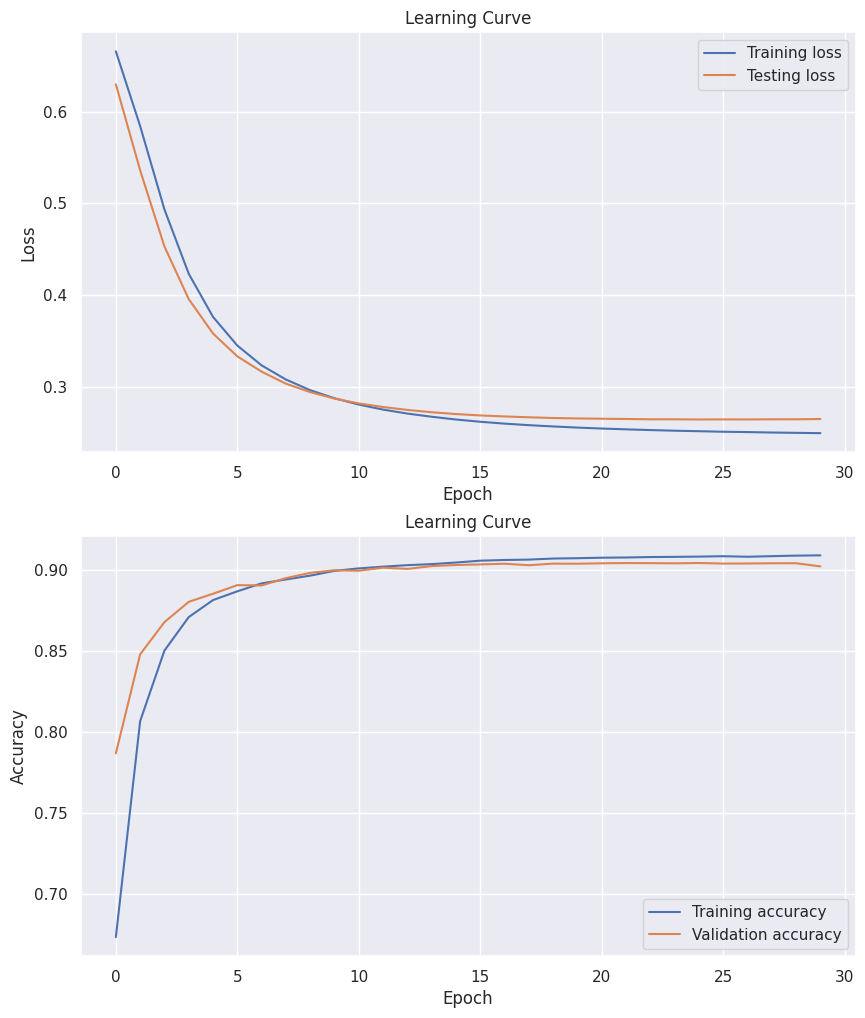

In [23]:
learning_curve(history1)

In [24]:
# model hyperparameters
embedding_dim = 16
num_epochs = 15
batch_size = 1000

# LSTM setup
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

history2 = model2.fit(train_padded, tf.one_hot(train_labels,2), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,2)), verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            40000     
                                                                 
 bidirectional (Bidirection  (None, 16)                1600      
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 41754 (163.10 KB)
Trainable params: 41754 (163.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
114/114 - 19s - loss: 0.5378 - accuracy: 0.7522 - val_loss: 0.2811 - va

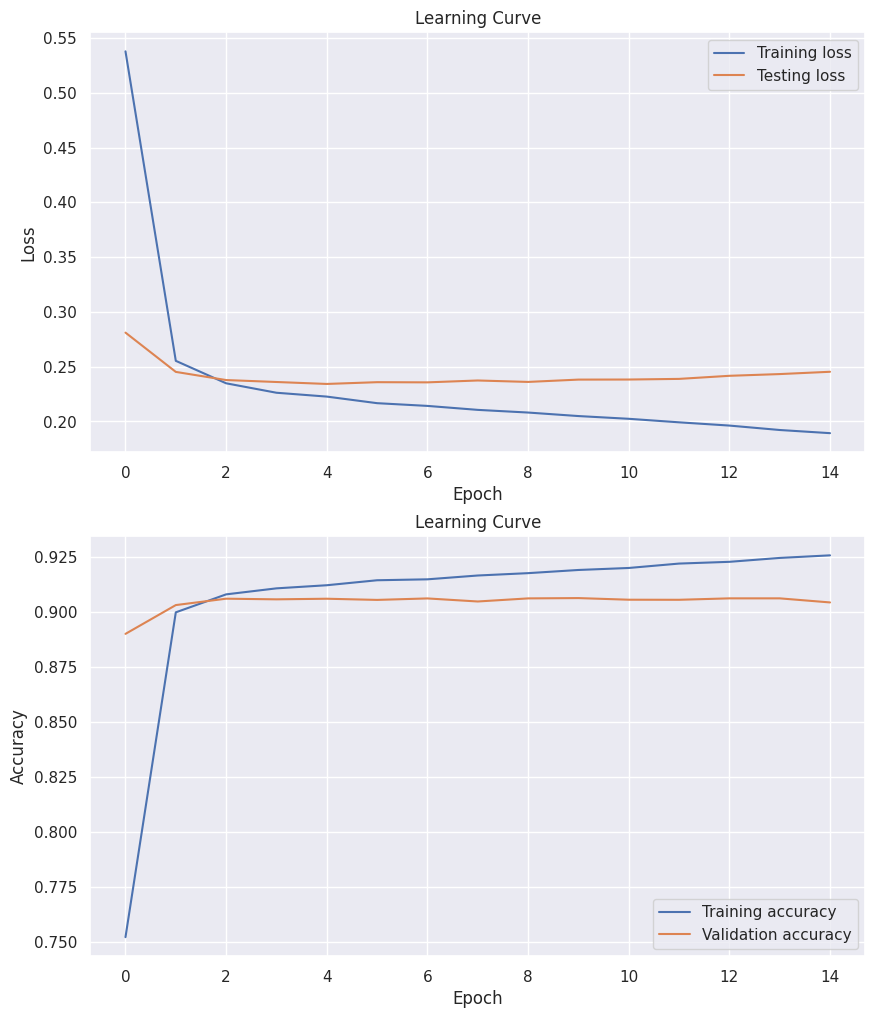

In [25]:
learning_curve(history2)

In [26]:
# model hyperparameters
embedding_dim = 8
num_epochs = 15
batch_size = 1000

# flatten layer
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model3.summary()

history3 = model3.fit(train_padded, tf.one_hot(train_labels,2), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,2)), verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 8)             20000     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 3208      
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 23226 (90.73 KB)
Trainable params: 23226 (90.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
114/114 - 2s - loss: 0.6822 - accuracy: 0.6302 - val_loss: 0.5660 - val_accuracy: 0.8515 - 2s/epoch - 17ms/step
Epoch 2/15
114/114 - 1s - l

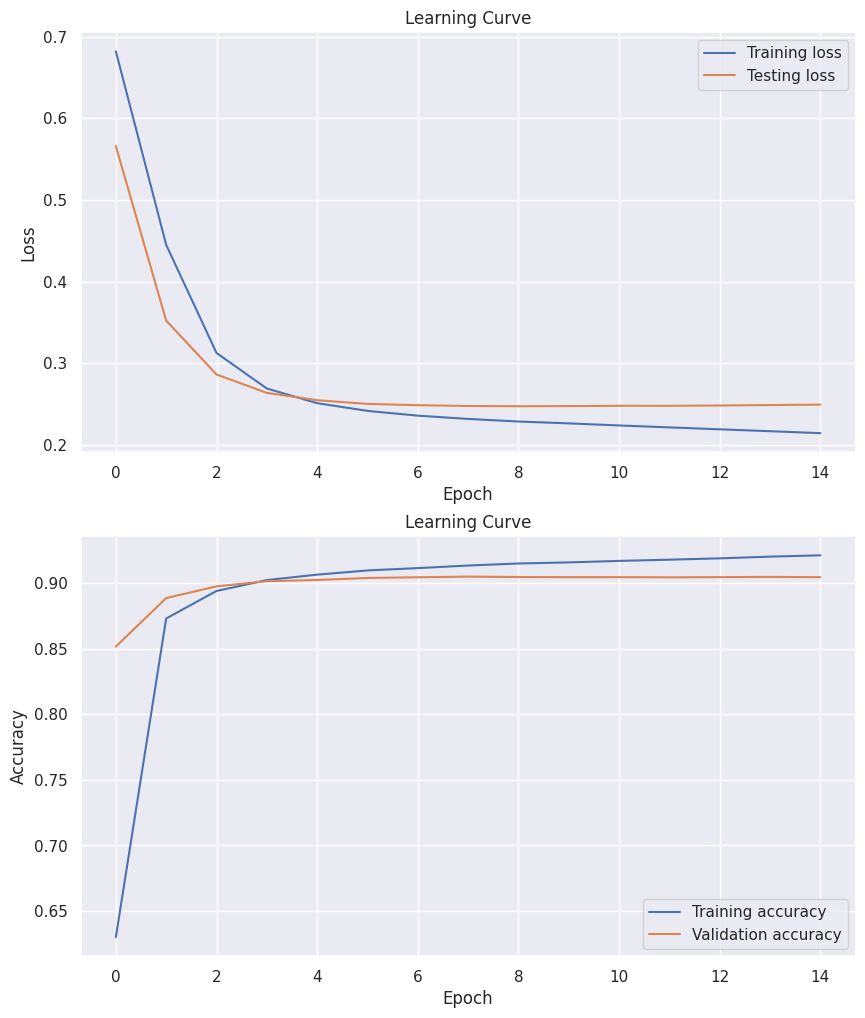

In [27]:
learning_curve(history3)

In [28]:
# model hyperparameters
embedding_dim = 16
num_epochs = 15
batch_size = 1000

# convolution
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model4.summary()

history4 = model4.fit(train_padded, tf.one_hot(train_labels,2), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,2)), verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            40000     
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           10368     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 50626 (197.76 KB)
Trainable params: 50626 (197.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
114/114 - 17s - loss: 0.4744 - accuracy: 0.7907 - val_loss: 0.2861 - va

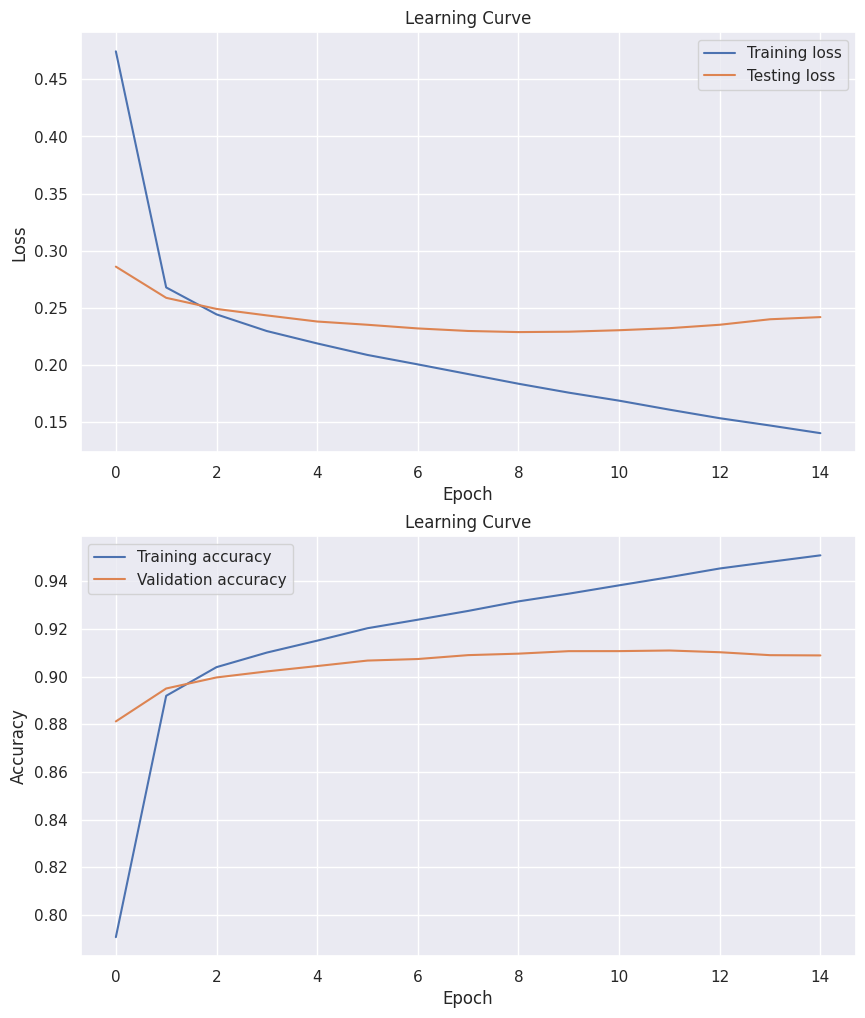

In [29]:
learning_curve(history4)

In [30]:
# model hyperparameters
embedding_dim = 16
num_epochs = 15
batch_size = 1000

# more complicated LSTM setup
model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model5.summary()

history5 = model5.fit(train_padded, tf.one_hot(train_labels,2), batch_size=batch_size, epochs=num_epochs, validation_data=(test_padded, tf.one_hot(test_labels,2)), verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            40000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 64)            12544     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 63194 (246.85 KB)
Trainable params: 6319

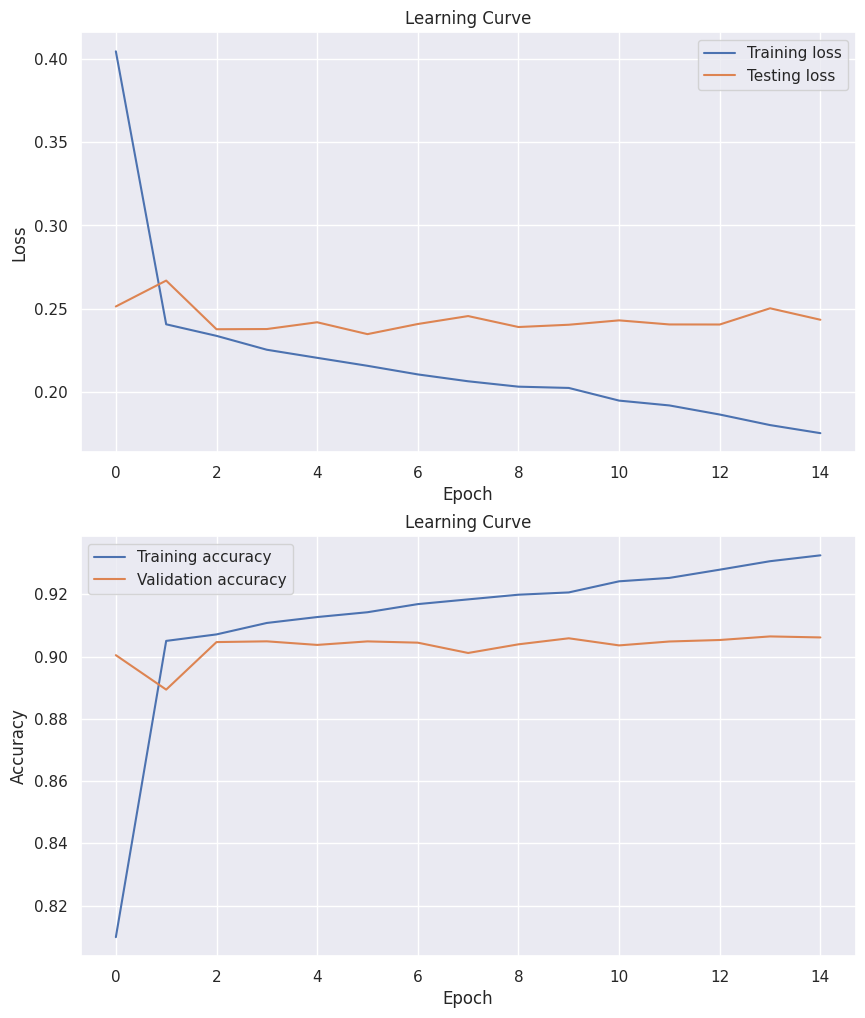

In [31]:
learning_curve(history5)

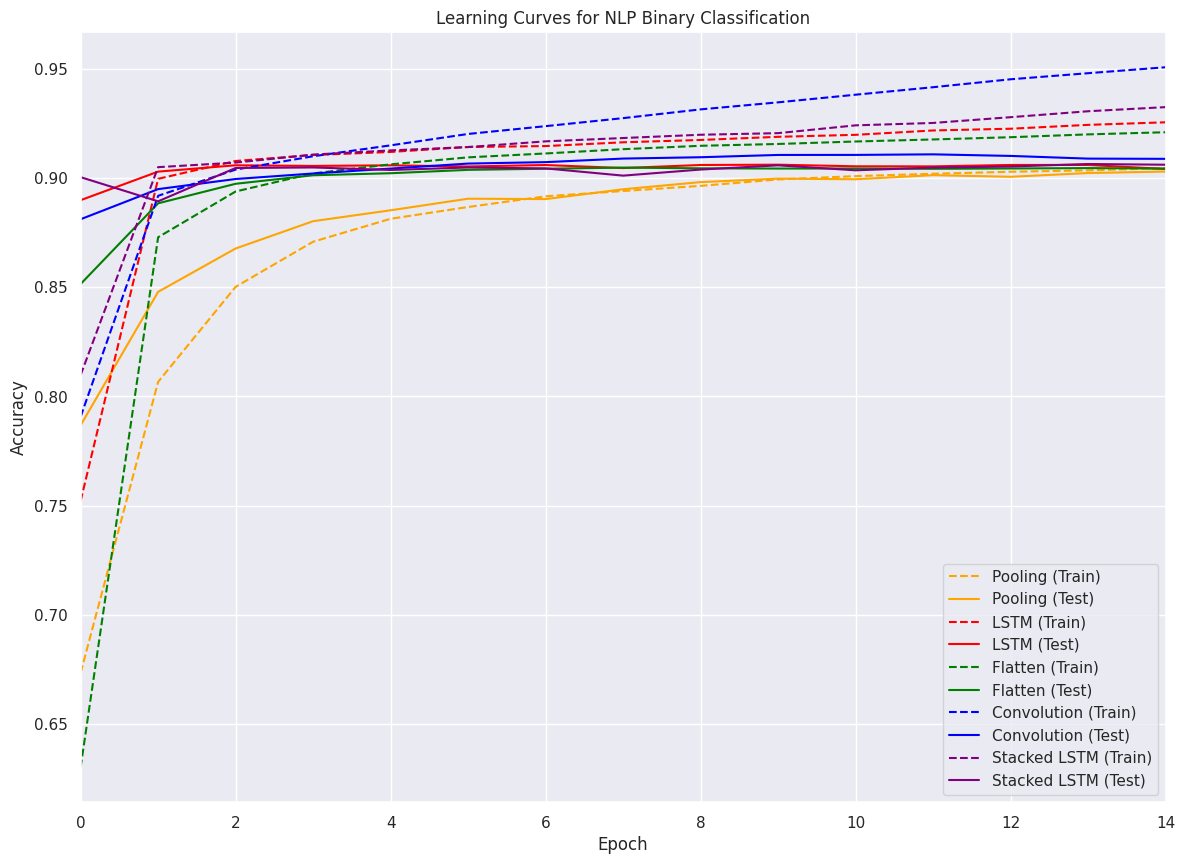

In [32]:
# Plot all five learning curves on the same axes.
plt.figure(figsize=(14,10))

# plt.axhline(0.5, label='Baseline', color='black')
plt.plot(history1.history['accuracy'], label='Pooling (Train)', color='orange', linestyle='dashed')
plt.plot(history1.history['val_accuracy'], label='Pooling (Test)', color='orange')
plt.plot(history2.history['accuracy'], label='LSTM (Train)', color='red', linestyle='dashed')
plt.plot(history2.history['val_accuracy'], label='LSTM (Test)', color='red')
plt.plot(history3.history['accuracy'], label='Flatten (Train)', color='green', linestyle='dashed')
plt.plot(history3.history['val_accuracy'], label='Flatten (Test)', color='green')
plt.plot(history4.history['accuracy'], label='Convolution (Train)', color='blue', linestyle='dashed')
plt.plot(history4.history['val_accuracy'], label='Convolution (Test)', color='blue')
plt.plot(history5.history['accuracy'], label='Stacked LSTM (Train)', color='purple', linestyle='dashed')
plt.plot(history5.history['val_accuracy'], label='Stacked LSTM (Test)', color='purple')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim(0,14)
# plt.ylim((0.5,0.8))
plt.title('Learning Curves for NLP Binary Classification')

plt.show()

# Confusion matrix analysis
---

In [33]:
from sklearn.metrics import confusion_matrix
import itertools

In [34]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix without normalisation")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
def confusion_matrix_complete(model, classes=['Negative', 'Positive'],
                              normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

  model_raw_predictions = model.predict(test_padded)
  model_rounded_predictions = np.argmax(model_raw_predictions, axis=-1)

  cm = confusion_matrix(y_true = test_labels, y_pred = model_rounded_predictions)

  plot_confusion_matrix(cm=cm, classes=classes, title=title)

In [36]:
# set plotting style for confusion matrices
sns.reset_orig()

1821/1821 [==============================] - 6s 3ms/step
Confusion matrix without normalisation
[[25965  3152]
 [ 2549 26604]]


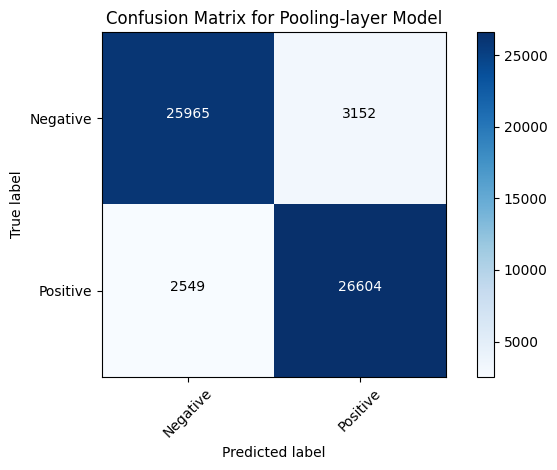

In [37]:
confusion_matrix_complete(model=model1, title='Confusion Matrix for Pooling-layer Model')

1821/1821 [==============================] - 19s 9ms/step
Confusion matrix without normalisation
[[26509  2608]
 [ 2974 26179]]


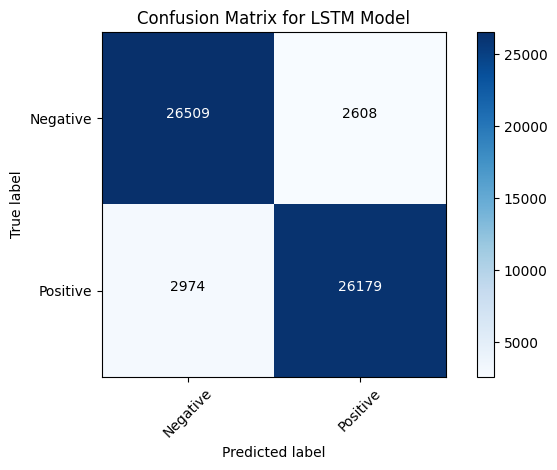

In [38]:
confusion_matrix_complete(model=model2, title='Confusion Matrix for LSTM Model')

1821/1821 [==============================] - 3s 1ms/step
Confusion matrix without normalisation
[[26382  2735]
 [ 2836 26317]]


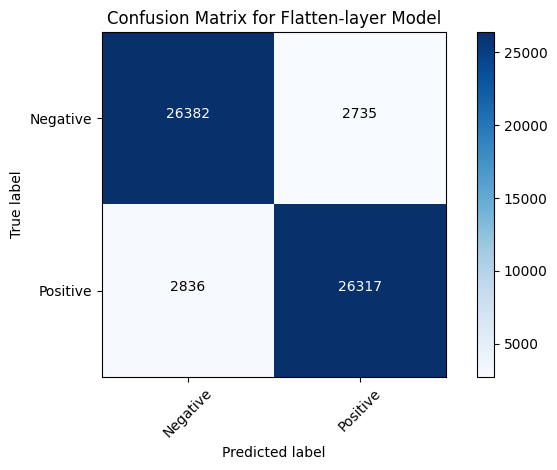

In [39]:
confusion_matrix_complete(model=model3, title='Confusion Matrix for Flatten-layer Model')

1821/1821 [==============================] - 5s 3ms/step
Confusion matrix without normalisation
[[26408  2709]
 [ 2602 26551]]


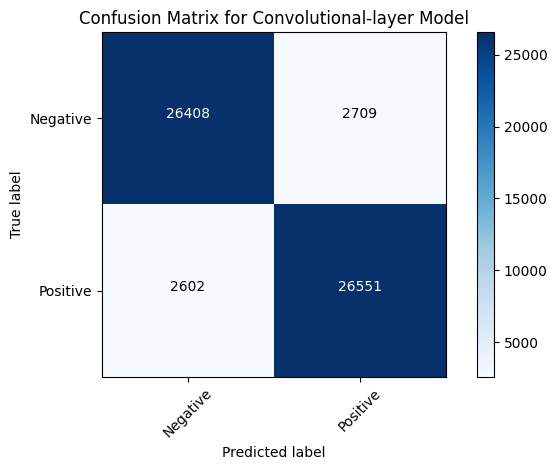

In [40]:
confusion_matrix_complete(model=model4, title='Confusion Matrix for Convolutional-layer Model')

1821/1821 [==============================] - 36s 19ms/step
Confusion matrix without normalisation
[[26528  2589]
 [ 2879 26274]]


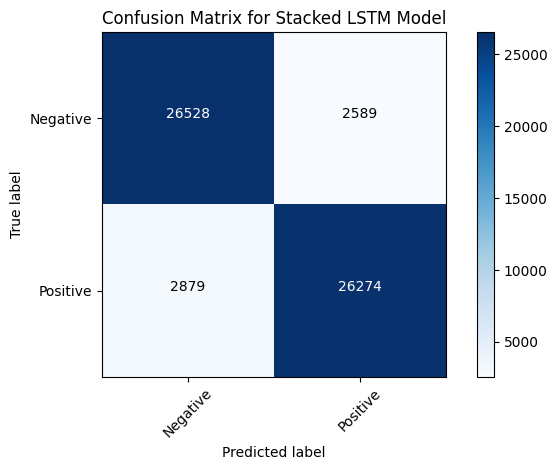

In [41]:
confusion_matrix_complete(model=model5, title='Confusion Matrix for Stacked LSTM Model')